# 참고도서 코드

In [3]:
import csv

max_temp = -999
max_date = ''

with open('seoul.csv', 'r', encoding='cp949') as f:
    data = csv.reader(f)
    header = next(data)

    for row in data:
        if row[4] == '':
            row[4] = -999

        row[4] = float(row[4])

        if max_temp < row[4]:
            max_temp = row[4]
            max_date = row[0].strip()
        
print(f'서울 최고 기온, 일자: {max_date}, 기온: {max_temp}')

서울 최고 기온, 일자: 2018-08-01, 기온: 39.6


In [4]:
import csv

min_temp = 999
min_date = ''

with open('seoul.csv', 'r', encoding='cp949') as f:
    data = csv.reader(f)
    header = next(data)

    for row in data:
        if row[3] == '':
            row[3] = 999

        row[3] = float(row[3])

        if min_temp > row[3]:
            min_temp = row[3]
            min_date = row[0].strip()
        
print(f'서울 최저 기온, 일자: {min_date}, 기온: {min_temp}')

서울 최저 기온, 일자: 1927-12-31, 기온: -23.1


In [5]:

import csv

max_temp = []
min_temp = []

with open('seoul.csv', 'r', encoding='cp949') as f:
    data = csv.reader(f)
    header = next(data)

    for row in data:
        if row[3] == '':
            row[3] = 999
        if row[4] == '':
            row[4] = -999
            
        row[3] = float(row[3])
        row[4] = float(row[4])

        min_temp.append(row[3])
        max_temp.append(row[4])
        
print(f'서울 최고 기온 10개')
max_temp.sort(reverse=True)
print(max_temp[:10])

print(f'서울 최저 기온 10개')
min_temp.sort()
print(min_temp[:10])

서울 최고 기온 10개
[39.6, 38.4, 38.3, 38.2, 38.2, 38.2, 38.0, 38.0, 37.9, 37.9]
서울 최저 기온 10개
[-23.1, -22.5, -22.3, -22.2, -21.9, -21.8, -21.7, -21.5, -21.3, -21.3]


# chatGPT 코드

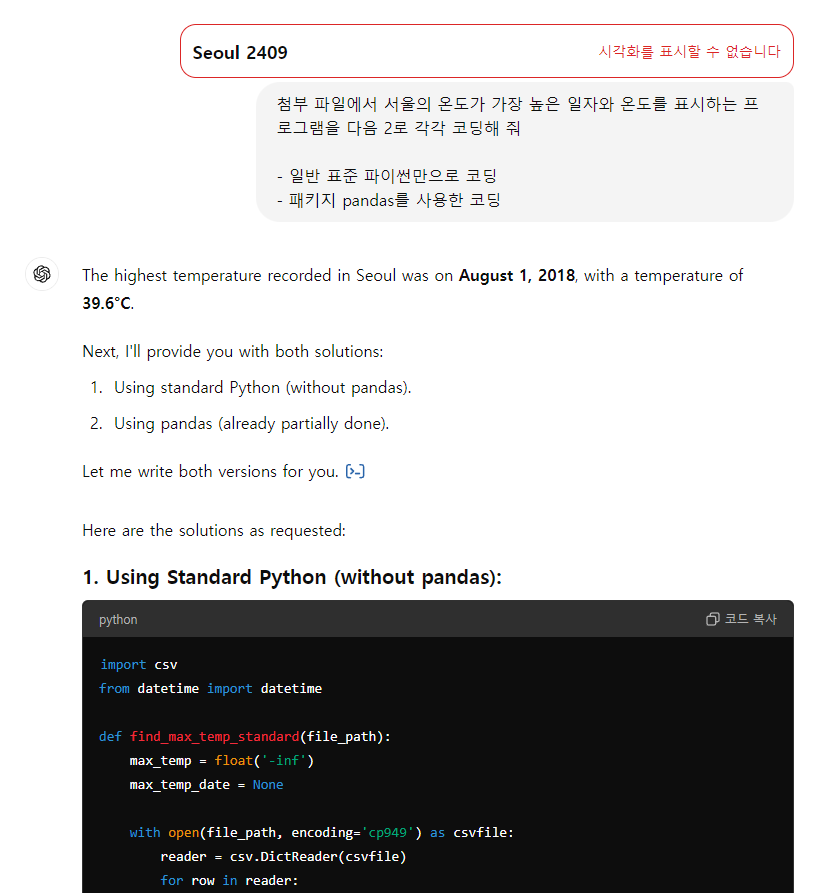

In [6]:
import csv
from datetime import datetime

def find_max_temp_standard(file_path):
    max_temp = float('-inf')
    max_temp_date = None

    with open(file_path, encoding='cp949') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            try:
                temp = float(row['최고기온(℃)'].strip())
                date_str = row['날짜'].strip()
                date = datetime.strptime(date_str, '%Y-%m-%d')
                
                if temp > max_temp:
                    max_temp = temp
                    max_temp_date = date
            except ValueError:
                continue

    return max_temp_date, max_temp

# Usage
file_path = 'seoul_2409.csv'  # Replace with your actual file path
max_temp_date, max_temp = find_max_temp_standard(file_path)
print(f"The highest temperature was {max_temp}°C on {max_temp_date.strftime('%Y-%m-%d')}")

The highest temperature was 39.6°C on 2018-08-01


In [8]:
import csv
from datetime import datetime

def find_min_temp_standard(file_path):
    min_temp = float('inf')
    min_temp_date = None

    with open(file_path, encoding='cp949') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            try:
                temp = float(row['최저기온(℃)'].strip())
                date_str = row['날짜'].strip()
                date = datetime.strptime(date_str, '%Y-%m-%d')
                
                if temp < min_temp:
                    min_temp = temp
                    min_temp_date = date
            except ValueError:
                continue

    return min_temp_date, min_temp

# Usage
file_path = 'seoul_2409.csv'  # Replace with your actual file path
min_temp_date, min_temp = find_min_temp_standard(file_path)
print(f"The lowest temperature was {min_temp}°C on {min_temp_date.strftime('%Y-%m-%d')}")

The lowest temperature was -23.1°C on 1927-12-31


In [7]:
import pandas as pd

# Load the CSV file
file_path = 'seoul_2409.csv'  # Replace with your actual file path
data = pd.read_csv(file_path, encoding='cp949')

# Clean the data
data['날짜'] = data['날짜'].str.strip()
data.columns = data.columns.str.strip()
data['날짜'] = pd.to_datetime(data['날짜'], errors='coerce')

# Find the date with the highest temperature
max_temp_row = data.loc[data['최고기온(℃)'].idxmax()]
max_temp_date = max_temp_row['날짜']
max_temp = max_temp_row['최고기온(℃)']

print(f"The highest temperature was {max_temp}°C on {max_temp_date.strftime('%Y-%m-%d')}")

The highest temperature was 39.6°C on 2018-08-01
